In [30]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


In [31]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)
y = y.reshape(len(y),1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [35]:
# feature scalling
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)
print(y)
print(x)


[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [33]:
# train a svr model
from sklearn.svm  import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

c:\Users\Danial Nasir Awan'\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Here i will use the sc_x.transform method to scale the value of 6.5 to the scale my model is fit on.
which i will use as input to the regressor.predict function whichh will return the prediction in scale to the scaled y values in feature scalling part
the sc_y.inverse_transformation function returns the predicted value scaled to the original scale

In [34]:
# predicting the values of y with revertion of the values to thier original scale
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

to visualise we will be using values on the original scale
the scater plot(red dots) are the original x,y values
the blue line are the predicted values

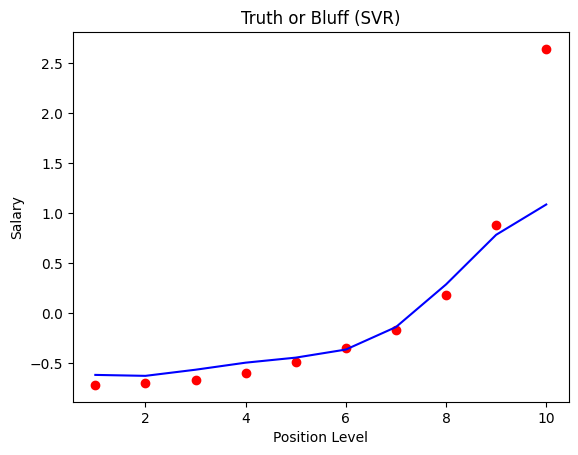

In [36]:
# visuallising
# Visualising the SVR
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

we use X_grid to increase the number of points to get a smoother curve SIMPLE

C:\Users\Danial Nasir Awan'\AppData\Local\Temp\ipykernel_20136\2910991883.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(min(sc_x.inverse_transform(x))), max(sc_x.inverse_transform(x)), 0.1)


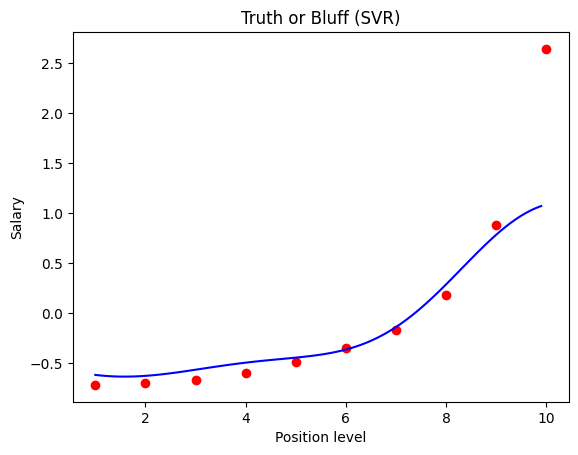

In [39]:
# Visualising the SVR results (for higher resolution and smoother curve)

X_grid = np.arange(min(min(sc_x.inverse_transform(x))), max(sc_x.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()